# Distributions of Annotated Data

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opinionated
plt.style.use("opinionated_rc")

# Read in the metadata file
df = pd.read_csv("../full-dataset-metadata.csv")

# Read in the annotation files
annotation_details = []
for short_name in [
    "seattle",
    "oakland",
    "richmond",
]:
    council_annotations = pd.read_csv(f"../data/whole-period-seg-{short_name}.csv")
    council_annotations["council"] = short_name

    # Handle seattle not having a transcript quality column
    if short_name == "seattle":
        council_annotations["transcript_quality"] = "good"

    annotation_details.append(council_annotations)

# Combine the annotations
all_annotations = pd.concat(annotation_details)

# Replace transcript quality values
all_annotations["transcript_quality"] = all_annotations["transcript_quality"].replace({
    "good-safe-use": "good",
    "good-safe-to-use": "good",
    "okay-use-if-needed": "good",
    "bad-do-not-use": "bad",
})

# Groupby council and session_id
# check period_start_sentence_index or period_end_sentence_index
# If either is not null, the session has a public comment period
# Create a row that is council, session_id, has_public_comment_period, and transcript_quality
def process_council_session_group(group):
    return pd.Series({
        "has_public_comment_period": group["period_start_sentence_index"].notnull().any() or group["period_end_sentence_index"].notnull().any(),
        "transcript_quality": group["transcript_quality"].iloc[0],
    })

council_session_annotations = all_annotations.groupby(["council", "session_id"]).apply(process_council_session_group).reset_index()

# Merge the metadata with the annotations
df = df.merge(council_session_annotations, on=["council", "session_id"])

# Drop anything with bad transcript quality
df = df[(df["transcript_quality"] == "good") & (df["has_public_comment_period"])]

# Convert session_datetime to a datetime object
df["session_datetime"] = pd.to_datetime(df["session_datetime"])
df["year"] = df["session_datetime"].dt.year

# Convert from

df.sample(3)

Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

,council,session_id,session_datetime,body_name,normalized_body_name,cdp_url,source_video_url,has_public_comment_period,transcript_quality,year
129,seattle,1a60d7dba27c,2021-07-26 21:00:00+00:00,City Council,full council,https://councildataproject.org/seattle/#/event...,https://video.seattle.gov/media/council/counci...,True,good,2021
253,oakland,990de9e8281b,2021-11-02 20:30:00+00:00,* Concurrent Meeting of the Oakland Redevelopm...,full council,https://councildataproject.org/oakland/#/event...,https://storage.googleapis.com/download/storag...,True,good,2021
101,seattle,f65a1f8c6f04,2020-09-22 16:30:00+00:00,Public Safety and Human Services Committee,other,https://councildataproject.org/seattle/#/event...,https://video.seattle.gov/media/council/safe_0...,True,good,2020


## Annotated Meetings by Council and Year

In [2]:
print(f"{len(df)} total sessions")

349 total sessions


Council breakdown:

oakland     159
seattle     146
richmond     44
Name: council, dtype: int64


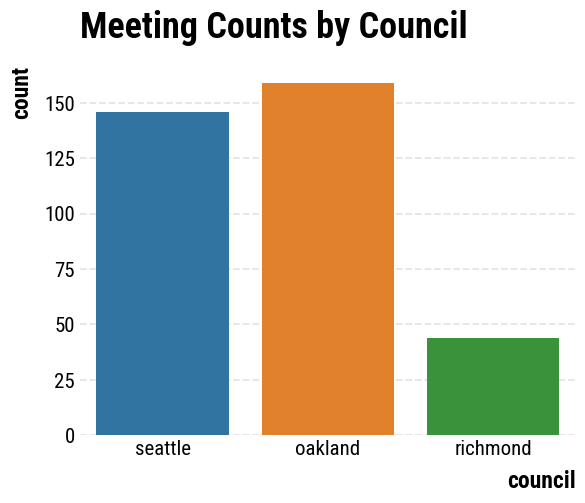

In [3]:
print("Council breakdown:")
print()
print(df.council.value_counts())

_ = sns.countplot(
    data=df,
    x="council",
    hue="council",
).set_title("Meeting Counts by Council")

## Annotated Meetings by Council over Time

Council+Year breakdown:

council   year
oakland   2020    45
          2021    54
          2022    51
          2023     9
richmond  2020    12
          2021    16
          2022     9
          2023     7
seattle   2020    31
          2021    54
          2022    41
          2023    20
dtype: int64


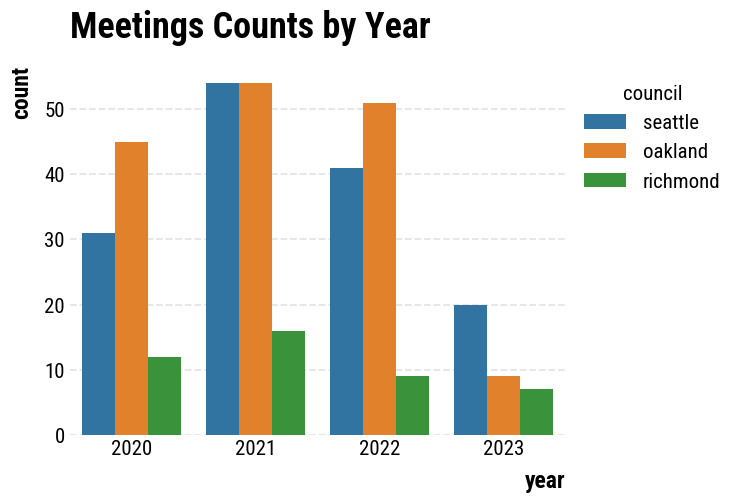

In [4]:
print("Council+Year breakdown:")
print()
print(df.groupby(["council", "year"]).size())

# Plot
_ = sns.countplot(
    data=df,
    x="year",
    hue="council",
).set_title("Meetings Counts by Year")

# Move legend outside of plot
_ = sns.move_legend(
    plt.gca(),
    bbox_to_anchor=(1, 1),
    loc="upper left",
)

## Annotated Meetings by Committee and Year

CommitteeType+Council breakdown:

normalized_body_name  council 
full council          oakland     46
                      richmond    16
                      seattle     37
housing committee     oakland     19
                      richmond     3
                      seattle     25
other                 oakland     94
                      richmond    25
                      seattle     84
dtype: int64


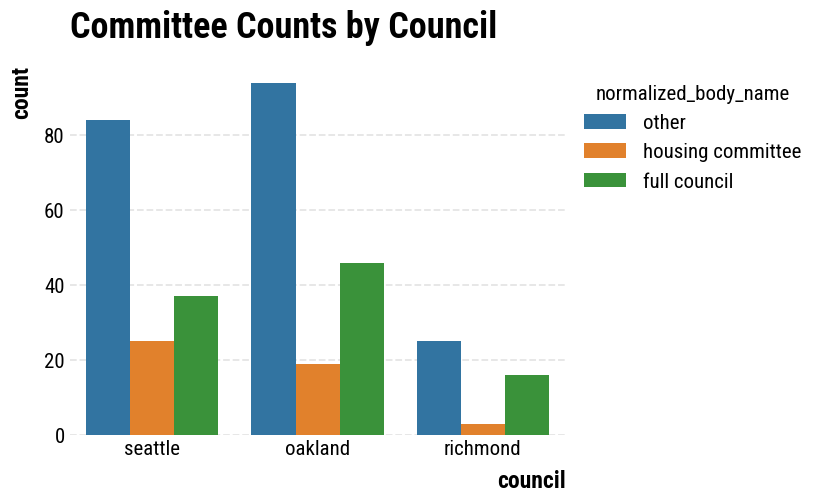

In [5]:
print("CommitteeType+Council breakdown:")
print()
print(df.groupby(["normalized_body_name", "council"]).size())

_ = sns.countplot(
    data=df,
    x="council",
    hue="normalized_body_name",
).set_title("Committee Counts by Council")

# Move legend outside of plot
_ = sns.move_legend(
    plt.gca(),
    bbox_to_anchor=(1, 1),
    loc="upper left",
)

CommitteeType+Council+Year breakdown:

normalized_body_name  council   year
full council          oakland   2020    17
                                2021    14
                                2022    14
                                2023     1
                      richmond  2020     2
                                2021     8
                                2022     2
                                2023     4
                      seattle   2020    11
                                2021    12
                                2022     9
                                2023     5
housing committee     oakland   2020     7
                                2021     6
                                2022     5
                                2023     1
                      richmond  2020     2
                                2022     1
                      seattle   2020     2
                                2021    11
                                2022    10
                     

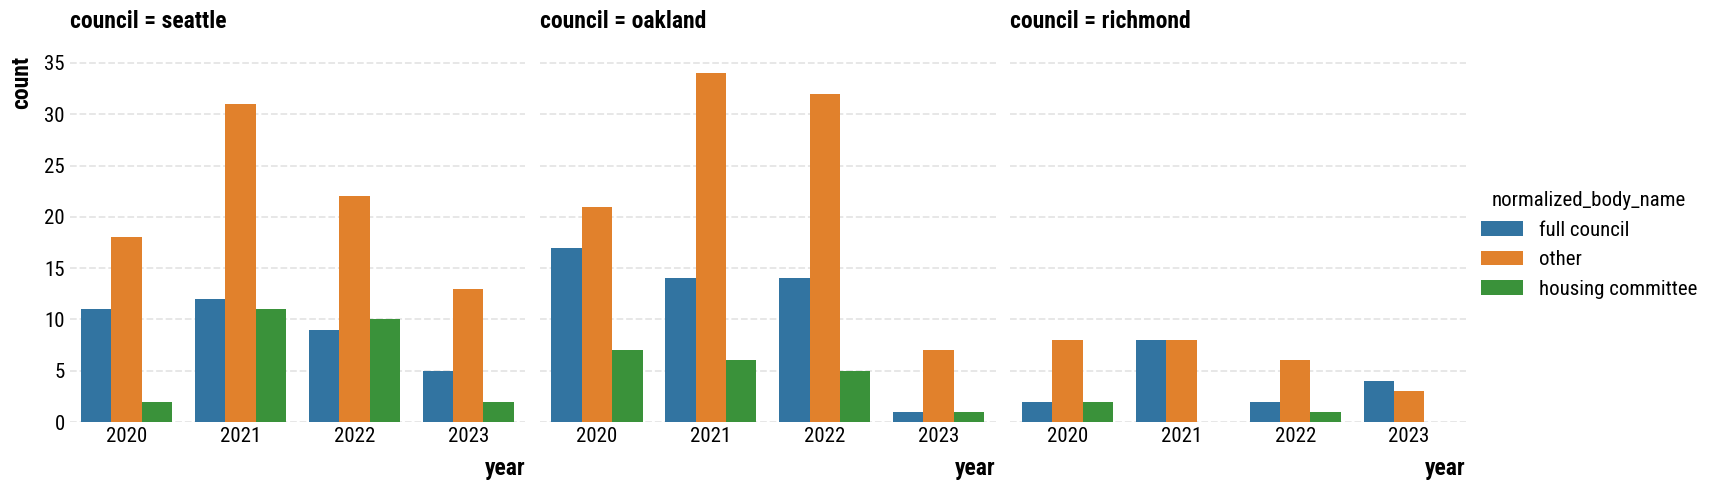

In [6]:
print("CommitteeType+Council+Year breakdown:")
print()
print(df.groupby(["normalized_body_name", "council", "year"]).size())

_ = sns.catplot(
    data=df,
    x="year",
    hue="normalized_body_name",
    col="council",
    kind="count",
)